In [1]:
import pandas as pd
import numpy as np

trmean=pd.read_csv('/home/aaftab/Github/Flipr-Hackathon/Mean-Filled.csv')
tstdt=pd.read_csv('/home/aaftab/Github/Flipr-Hackathon/Mean-Filled-test.csv')

In [2]:
features=trmean.copy()
features.drop('Infect_Prob',axis=1,inplace=True)
results=trmean['Infect_Prob']
testfeatures=tstdt.copy()

from sklearn import preprocessing
standard= preprocessing.StandardScaler()

features = standard.fit_transform(features)
testfeatures=standard.fit_transform(testfeatures)

features=pd.DataFrame(features)
testfeatures=pd.DataFrame(testfeatures)

In [6]:
from keras import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

def neuralregressor():
    regressor = Sequential()
    regressor.add(Dense(units=53, input_dim=53))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [13]:
lmr = KerasRegressor(build_fn=neuralregressor, batch_size=32,epochs=20)
lgr2= KerasRegressor(build_fn=neuralregressor, batch_size=32,epochs=20)

lmr.fit(features,results)



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, results, test_size=0.3, random_state=0)
lgr2.fit(X_train,y_train)
y_pred = lgr2.predict(X_test)
y_pred2=lgr2.predict(X_train)

import math
from math import sqrt
from sklearn.metrics import mean_squared_error

mse1=mean_squared_error(y_train, y_pred2)
rmse1=sqrt(mse1)
print(str(rmse1)+'Training error')
mse2=mean_squared_error(y_test, y_pred)
rmse2=sqrt(mse1)
print(str(rmse2)+'Testing Error')
        
predictions = lmr.predict(testfeatures)
pred=pd.DataFrame(predictions)
        
pred.to_csv('NeuralNetworkRegressionPredictions.csv')

Epoch 1/20
10714/10714 [==============================] - 3s 301us/step - loss: 2536.7851 - mae: 49.3309 - accuracy: 0.0000e+00
Epoch 2/20
10714/10714 [==============================] - 2s 204us/step - loss: 1117.4284 - mae: 31.3923 - accuracy: 0.0000e+00
Epoch 3/20
10714/10714 [==============================] - 2s 215us/step - loss: 173.8089 - mae: 10.3500 - accuracy: 0.0000e+00
Epoch 4/20
10714/10714 [==============================] - 2s 209us/step - loss: 83.8937 - mae: 4.9490 - accuracy: 0.0000e+00
Epoch 5/20
10714/10714 [==============================] - 2s 225us/step - loss: 83.2186 - mae: 4.8404 - accuracy: 0.0000e+00
Epoch 6/20
10714/10714 [==============================] - 2s 200us/step - loss: 83.1565 - mae: 4.8563 - accuracy: 0.0000e+00
Epoch 7/20
10714/10714 [==============================] - 3s 246us/step - loss: 83.4929 - mae: 4.8489 - accuracy: 0.0000e+00
Epoch 8/20
10714/10714 [==============================] - 2s 163us/step - loss: 83.4048 - mae: 4.8767 - accuracy: 0.0

In [14]:
from keras import Sequential
from keras.layers import Dense

lmrr = Sequential([Dense(32, activation='relu', input_shape=(53,)),Dense(32, activation='relu'),Dense(1, activation='sigmoid')])
lmrr.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(features, results, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

a=lmrr.fit(X_train, Y_train,batch_size=32,epochs=100,validation_data=(X_val, Y_val))

lmrr.evaluate(X_test, Y_test)[1]
predictions = lmrr.predict(testfeatures)
pred=pd.DataFrame(predictions)

pred.to_csv('NeuralNetworkRegression2Predictions.csv')

Train on 7499 samples, validate on 1607 samples
Epoch 1/100
7499/7499 [==============================] - 1s 187us/step - loss: 2742.1604 - mae: 51.2812 - val_loss: 2746.5965 - val_mae: 51.3112
Epoch 2/100
7499/7499 [==============================] - 1s 125us/step - loss: 2735.0503 - mae: 51.2112 - val_loss: 2746.4542 - val_mae: 51.3098
Epoch 3/100
7499/7499 [==============================] - 1s 109us/step - loss: 2734.9887 - mae: 51.2106 - val_loss: 2746.4329 - val_mae: 51.3096
Epoch 4/100
7499/7499 [==============================] - 1s 173us/step - loss: 2734.9788 - mae: 51.2105 - val_loss: 2746.4284 - val_mae: 51.3095
Epoch 5/100
7499/7499 [==============================] - 1s 120us/step - loss: 2734.9763 - mae: 51.2105 - val_loss: 2746.4268 - val_mae: 51.3095
Epoch 6/100
7499/7499 [==============================] - 1s 134us/step - loss: 2734.9752 - mae: 51.2105 - val_loss: 2746.4261 - val_mae: 51.3095
Epoch 7/100
7499/7499 [==============================] - 1s 128us/step - loss: 273

Epoch 57/100
7499/7499 [==============================] - 1s 133us/step - loss: 2734.9739 - mae: 51.2104 - val_loss: 2746.4249 - val_mae: 51.3095
Epoch 58/100
7499/7499 [==============================] - 1s 130us/step - loss: 2734.9739 - mae: 51.2105 - val_loss: 2746.4249 - val_mae: 51.3095
Epoch 59/100
7499/7499 [==============================] - 1s 124us/step - loss: 2734.9739 - mae: 51.2105 - val_loss: 2746.4249 - val_mae: 51.3095
Epoch 60/100
7499/7499 [==============================] - 1s 151us/step - loss: 2734.9739 - mae: 51.2105 - val_loss: 2746.4249 - val_mae: 51.3095
Epoch 61/100
7499/7499 [==============================] - 1s 118us/step - loss: 2734.9739 - mae: 51.2105 - val_loss: 2746.4249 - val_mae: 51.3095
Epoch 62/100
7499/7499 [==============================] - 1s 115us/step - loss: 2734.9739 - mae: 51.2105 - val_loss: 2746.4249 - val_mae: 51.3095
Epoch 63/100
7499/7499 [==============================] - 1s 144us/step - loss: 2734.9739 - mae: 51.2105 - val_loss: 2746.42

In [15]:
lmrr.evaluate(X_test, Y_test)[1]

1608/1608 [==============================] - 0s 64us/step


51.57933807373047

In [16]:
lmrr.evaluate(X_train, Y_train)[1]

7499/7499 [==============================] - 1s 68us/step


51.21046447753906

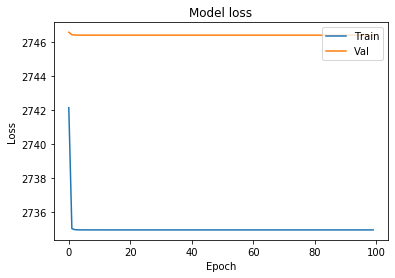

None


In [18]:
import matplotlib.pyplot as plt

plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
print(plt.show())

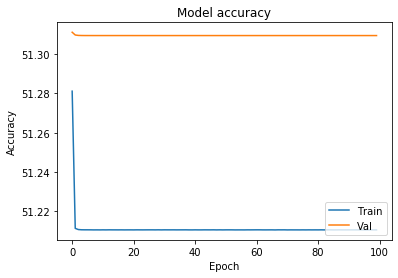

In [17]:
plt.plot(a.history['mae'])
plt.plot(a.history['val_mae'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()



Train on 7499 samples, validate on 1607 samples
Epoch 1/100
7499/7499 [==============================] - 1s 121us/step - loss: 2749.7766 - mae: 51.3432 - val_loss: 2692.8645 - val_mae: 50.8987
Epoch 2/100
7499/7499 [==============================] - 1s 70us/step - loss: 2744.8692 - mae: 51.2954 - val_loss: 2692.7547 - val_mae: 50.8975
Epoch 3/100
7499/7499 [==============================] - 1s 91us/step - loss: 2744.8305 - mae: 51.2950 - val_loss: 2692.7436 - val_mae: 50.8974
Epoch 4/100
7499/7499 [==============================] - 1s 96us/step - loss: 2744.8248 - mae: 51.2949 - val_loss: 2692.7406 - val_mae: 50.8974
Epoch 5/100
7499/7499 [==============================] - 1s 76us/step - loss: 2744.8230 - mae: 51.2949 - val_loss: 2692.7394 - val_mae: 50.8974
Epoch 6/100
7499/7499 [==============================] - 1s 69us/step - loss: 2744.8221 - mae: 51.2949 - val_loss: 2692.7388 - val_mae: 50.8974
Epoch 7/100
7499/7499 [==============================] - 1s 82us/step - loss: 2744.8217

7499/7499 [==============================] - 1s 72us/step - loss: 2744.8207 - mae: 51.2949 - val_loss: 2692.7375 - val_mae: 50.8974
Epoch 58/100
7499/7499 [==============================] - 1s 69us/step - loss: 2744.8207 - mae: 51.2949 - val_loss: 2692.7375 - val_mae: 50.8974
Epoch 59/100
7499/7499 [==============================] - 0s 67us/step - loss: 2744.8207 - mae: 51.2949 - val_loss: 2692.7375 - val_mae: 50.8974
Epoch 60/100
7499/7499 [==============================] - 1s 76us/step - loss: 2744.8207 - mae: 51.2949 - val_loss: 2692.7375 - val_mae: 50.8974
Epoch 61/100
7499/7499 [==============================] - 1s 74us/step - loss: 2744.8207 - mae: 51.2949 - val_loss: 2692.7375 - val_mae: 50.8974
Epoch 62/100
7499/7499 [==============================] - 1s 70us/step - loss: 2744.8207 - mae: 51.2949 - val_loss: 2692.7375 - val_mae: 50.8974
Epoch 63/100
7499/7499 [==============================] - 0s 60us/step - loss: 2744.8207 - mae: 51.2949 - val_loss: 2692.7375 - val_mae: 50.897

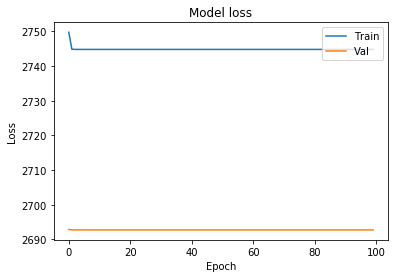

None


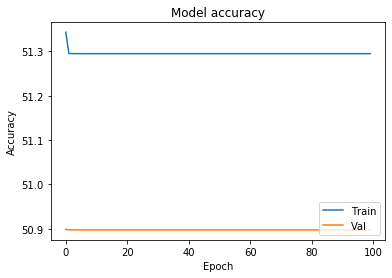

None


In [21]:
from keras import Sequential
from keras.layers import Dense

lmrr = Sequential([Dense(64, activation='relu', input_shape=(53,)),Dense(64, activation='relu'),Dense(1, activation='sigmoid')])
lmrr.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(features, results, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

a=lmrr.fit(X_train, Y_train,batch_size=64,epochs=100,validation_data=(X_val, Y_val))

lmrr.evaluate(X_test, Y_test)[1]
predictions = lmrr.predict(testfeatures)
pred=pd.DataFrame(predictions)

pred.to_csv('NeuralNetworkRegression2Predictions.csv')

lmrr.evaluate(X_test, Y_test)[1]
lmrr.evaluate(X_train, Y_train)[1]

import matplotlib.pyplot as plt

plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
print(plt.show())

plt.plot(a.history['mae'])
plt.plot(a.history['val_mae'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
print(plt.show())



Train on 7499 samples, validate on 1607 samples
Epoch 1/100
7499/7499 [==============================] - 2s 306us/step - loss: 2746.3741 - mae: 51.3023 - val_loss: 2788.6928 - val_mae: 51.6422
Epoch 2/100
7499/7499 [==============================] - 2s 295us/step - loss: 2743.8015 - mae: 51.2779 - val_loss: 2788.6602 - val_mae: 51.6418
Epoch 3/100
7499/7499 [==============================] - 2s 286us/step - loss: 2743.7882 - mae: 51.2778 - val_loss: 2788.6558 - val_mae: 51.6418
Epoch 4/100
7499/7499 [==============================] - 2s 273us/step - loss: 2743.7858 - mae: 51.2778 - val_loss: 2788.6546 - val_mae: 51.6418
Epoch 5/100
7499/7499 [==============================] - 2s 294us/step - loss: 2743.7851 - mae: 51.2777 - val_loss: 2788.6541 - val_mae: 51.6418
Epoch 6/100
7499/7499 [==============================] - 3s 392us/step - loss: 2743.7848 - mae: 51.2778 - val_loss: 2788.6539 - val_mae: 51.6418
Epoch 7/100
7499/7499 [==============================] - 3s 356us/step - loss: 274

Epoch 57/100
7499/7499 [==============================] - 2s 312us/step - loss: 2743.7844 - mae: 51.2777 - val_loss: 2788.6536 - val_mae: 51.6418
Epoch 58/100
7499/7499 [==============================] - 2s 266us/step - loss: 2743.7844 - mae: 51.2777 - val_loss: 2788.6536 - val_mae: 51.6418
Epoch 59/100
7499/7499 [==============================] - 2s 243us/step - loss: 2743.7844 - mae: 51.2777 - val_loss: 2788.6536 - val_mae: 51.6418
Epoch 60/100
7499/7499 [==============================] - 2s 244us/step - loss: 2743.7844 - mae: 51.2777 - val_loss: 2788.6536 - val_mae: 51.6418
Epoch 61/100
7499/7499 [==============================] - 2s 249us/step - loss: 2743.7844 - mae: 51.2777 - val_loss: 2788.6536 - val_mae: 51.6418
Epoch 62/100
7499/7499 [==============================] - 2s 252us/step - loss: 2743.7844 - mae: 51.2777 - val_loss: 2788.6536 - val_mae: 51.6418
Epoch 63/100
7499/7499 [==============================] - 2s 258us/step - loss: 2743.7844 - mae: 51.2777 - val_loss: 2788.65

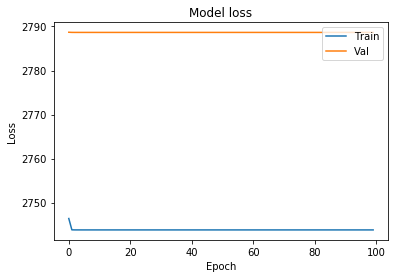

None


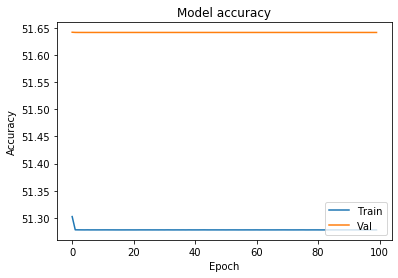

None


In [20]:
from keras import Sequential
from keras.layers import Dense

lmrr = Sequential([Dense(16, activation='relu', input_shape=(53,)),Dense(16, activation='relu'),Dense(1, activation='sigmoid')])
lmrr.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(features, results, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

a=lmrr.fit(X_train, Y_train,batch_size=16,epochs=100,validation_data=(X_val, Y_val))

lmrr.evaluate(X_test, Y_test)[1]
predictions = lmrr.predict(testfeatures)
pred=pd.DataFrame(predictions)

pred.to_csv('NeuralNetworkRegression2Predictions.csv')

lmrr.evaluate(X_test, Y_test)[1]
lmrr.evaluate(X_train, Y_train)[1]

import matplotlib.pyplot as plt

plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
print(plt.show())

plt.plot(a.history['mae'])
plt.plot(a.history['val_mae'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
print(plt.show())
